['yuri (229).jpg', 'yuri (231).jpg', 'yuri.jpg']
path+imageName :  ../test/Yuri/yuri (229).jpg


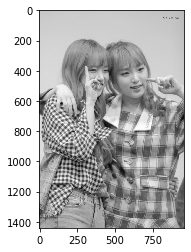

blur OK


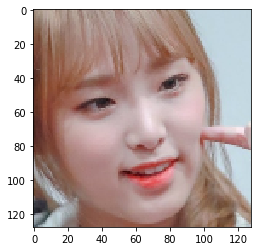

path+imageName :  ../test/Yuri/yuri (231).jpg


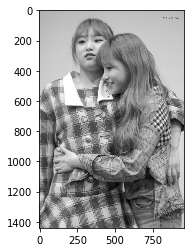

fail to find
path+imageName :  ../test/Yuri/yuri.jpg


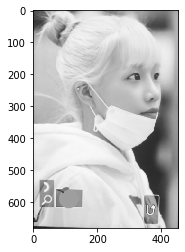

fail to find
['chaewon.jpg']
path+imageName :  ../test/Chaewon/chaewon.jpg


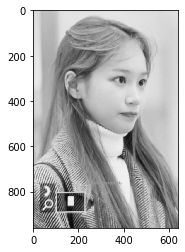

fail to find
['yaena.jpg']
path+imageName :  ../test/Yaena/yaena.jpg


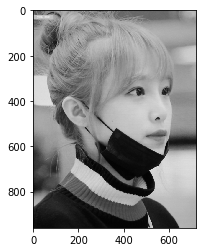

fail to find


In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os, os.path
import sys

# Notes: 'face.xml' is 'opencv/data/haarcascades/haarcascade_frontalface_default.xml'

frontFaceCascade = cv2.CascadeClassifier('../frontFace_default.xml')
profileFaceCascade = cv2.CascadeClassifier('../profileFace.xml')

# Notes : 'JoYuris' element is file directory
# raw image file is saved 'raw' dir and cropped file is saved 'cropped' dir
# ex) raw image : './Yuri/raw/1.jpg', cropped image : './Yuri/cropped/1.jpg' 

JoYuris =['Yuri', 'Chaewon', 'Yaena']
for member in JoYuris:
    #path = '../rawImage/' + member + '/'
    path = '../test/' + member + '/'
    imageList = os.listdir(path)
    print(format(imageList))
    cnt = 0
    for imageName in imageList:
        print("path+imageName : ",path+imageName)
        if imageName.strip().split('.')[-1] != 'jpg':
            continue
        image = cv2.imread(path+imageName)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        frontFaces = frontFaceCascade.detectMultiScale(gray, 1.3, 5)
        profileFaces = profileFaceCascade.detectMultiScale(gray, 1.3, 5)
        if len(frontFaces) > 0:
            faces = frontFaces
            print("raw OK")
        elif len(profileFaces) > 0:
            faces = profileFaces
            print("raw OK")
        else:
            #filterTest = cv2.bilateralFilter(image,5,75,75)
            #plt.imshow(cv2.cvtColor(filterTest,cv2.COLOR_BGR2RGB))
            #plt.show()
            #gray2 = cv2.cvtColor(filterTest, cv2.COLOR_BGR2GRAY)
            gray2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray2 = cv2.bilateralFilter(gray2, 5, 75, 75)
            plt.imshow(cv2.cvtColor(gray2, cv2.COLOR_BGR2RGB))
            plt.show()
            frontFaces = frontFaceCascade.detectMultiScale(gray2, 1.3, 5, minSize=(128, 128))
            profileFaces = profileFaceCascade.detectMultiScale(gray2, 1.3, 5, minSize=(128, 128))
            if len(frontFaces) > 0:
                faces = frontFaces
                print("blur OK")
            elif len(profileFaces) > 0:
                faces = profileFaces
                print("blur OK")
            else:
                print("fail to find")
                continue
        #x, y, w, h = faces[0]
        #print(x, y, w, h)
        for x, y, w, h in faces:
            cnt = cnt + 1
            tcnt = 0
            crop  = image[y:y+h, x:x+w]
            resized= cv2.resize(crop, (128, 128),interpolation = cv2.INTER_CUBIC)
            plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
            plt.show()
            cv2.imwrite('../trainImage/' +member + '/' +str(cnt)+'-'+str(tcnt)+'.jpg', resized)


